In [1]:
%pylab inline
import numpy as np
import matplotlib as plt
from scipy.fftpack import fft
import cmath as cm

Populating the interactive namespace from numpy and matplotlib


/Users/daniellozano/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Some Functions that will be used 

# $ \sigma=\sqrt{\gamma^2+(4\gamma \Omega/\pi)^2} \\ f(t)=\frac{\sigma t e^{\gamma t}}{sinh(\sigma t)} \simeq 2\sigma t e^{-(\sigma-\gamma)t} $

# $ w_{a} =-\frac{2 i k\kappa e^{-ikd}}{  (k^2 + \kappa^2)\cdot sin(\kappa d) \quad + \quad 2ik\kappa \cdot cos(\kappa d)  }\quad Above \\  w_{b} =\frac{2  k\kappa e^{-ikd}}{  (k^2 - \kappa^2)\cdot i sinh(\kappa d) \quad - \quad 2k\kappa \cdot cosh(\kappa d)  } \quad Bellow$  


In [2]:
def Dissipation_function(OMEGA,gamma,t):
    sigma=sqrt(gamma**2+(4.0*gamma*OMEGA/pi)**2)
    ft=2*sigma*t*exp(-(sigma-gamma)*t) 
    return ft

def Fourier(y,omega,t,dt,im):
    suma=0
    Fourier=zeros(len(y),type="complex")
    for i in range(len(y)):
        suma+=y[i]*exp(-omega[i]*t[i]*im)*dt
        Fourier[i]=suma

def integrate(dt,Y):
    suma=0.0
    for i in range(len(Y)):
        suma+=Y[i]*dt
        
    return suma

X=10000
dx=1.0/X
x=linspace(0,2*pi,X)
x1=ones(X)
y=sin(x)


print integrate(dx,y)



1.86567525413e-17


## Transmission functions with dissipation

In [3]:
def T_f_above(im,E,Vo,Vop,d,m,hbarc):
    
    EV=zeros(len(Vo),dtype="complex")
    
    for i in range(len(Vo)): 
        
        EV[i]=sqrt(complex(E-Vo[i]))
    
    k=sqrt(2.0*m*Vop*E)/hbarc # multiplying by Vop due to units
    
    kp=sqrt(2.0*m*Vop)*EV/hbarc
    
    w=-(2.0*im*k*kp*exp(-im*k*d)) / ( (k**2 + kp**2)*sin(kp*d) + 2*im*k*kp*cos(kp*d) ) 
    
    return w
        
def T_f_bellow(im,E,Vo,Vop,d,m,hbarc):
    
    EV=zeros(len(Vo),dtype="complex")
    
    for i in range(len(Vo)):
        EV[i]=sqrt(complex(Vo[i]-E))
    
    k=sqrt(2.0*m*Vop*E)/hbarc # multiplying by Vop due to units
    
    kp=sqrt(2.0*m*Vop)*EV/hbarc
    
    w=(2.0*k*kp*exp(-im*k*d)) / ( (k**2 - kp**2)*im*sinh(kp*d) - 2*k*kp*cosh(kp*d) )
    
    return w


## Transmission functions with no dissipation

In [13]:
def T_f_above_nd(im,E,Vop,d,m,hbarc):
   
    k=sqrt(2.0*m*Vop*E)/hbarc # multiplying by Vop due to units
    
    kp=sqrt(2.0*m*Vop*(E-Vop))/hbarc
    
    w=-(2.0*im*k*kp*exp(-im*k*d)) / ( (k**2 + kp**2)*sin(kp*d) + 2*im*k*kp*cos(kp*d) ) 
    
    return w
        
def T_f_bellow_nd(im,E,Vop,d,m,hbarc):
    
    k=sqrt(2.0*m*Vop*E)/hbarc # multiplying by Vop due to units
    
    kp=sqrt(2.0*m*Vop*(Vop-E))/hbarc
    
    w=(2.0*k*kp*exp(-im*k*d)) / ( (k**2 - kp**2)*im*sinh(kp*d) - 2*k*kp*cosh(kp*d) )
    
    return w



## Checking the dissipation function with $ \gamma=0.01 $

Last value of  \sqrt{f(t)}=  0.00911594432514


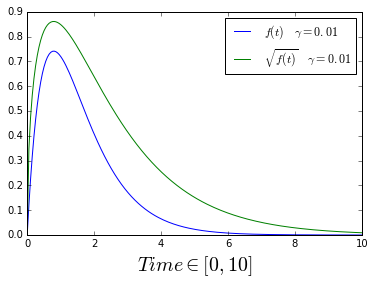

In [5]:
t=linspace(0,10,200)
ft=Dissipation_function(100,0.01,t)
plot(t,ft,label="$ f(t)\quad \gamma=0.01 $")
plot(t,np.sqrt(ft),label="$ \sqrt{f(t)}\quad \gamma=0.01 $")
xlabel("$ Time\in[0,10] $",size=20)
figsize(15,5)
legend()
print "Last value of  \sqrt{f(t)}= ",np.sqrt(ft)[-1]

## $F[f(x)]=\frac{1}{2\pi}\int_{-\infty}^{\infty}f(x)e^{-i\omega t}$

## Parameters used

In [6]:
#Definiendo algunas variables
T=500 #time used, size of the arrays
dt=1.0/T
Vop=1.8 # eV
hbarc=0.19733# ev Microm *c
c=2.998*10**14 # Microm/sec
hbar=hbarc/c
m=0.511*10**6 # ev
d=20.8*10**-4 # Microm
OMEGA=100 #Cutoff frequency used
im=complex(0,1) #definiendo i

print "hbar=",hbar,"eV/s \ni=", im,type(im)# ev s^{-1}

hbar= 6.58205470314e-16 eV/s 
i= 1j <type 'complex'>


## Arrays that will be used

In [7]:
Gamma=[1*10**-2,5*10**-2] # se toman 3 gamas diferentes

E1=np.linspace(0.01,0.999,T) #array of energy uppon Vo bellow the barrier
E2=np.linspace(1.001,2,T) #array of energy uppon Vo above the barrier

OMG=1E14
omega=np.linspace(-OMG,OMG,T)
#omega=np.linspace((-0.99*Vop)/hbar,(0.99*Vop)/hbar,T) #omega used in the Fourier Transform, 
                                                      #It goes from -Vop/hbar to Vop\hbar,with size=T

trans=zeros([len(E1),4])# in this array we will save the transforms, bellow and above

t=np.linspace(0,10,T)#time used

print "Minimun value of omega=",min(omega*hbar),"\nMaximun value of omega=",max(omega*hbar)

Minimun value of omega= -0.0658205470314 
Maximun value of omega= 0.0658205470314


In [8]:

for k in range(2): #doing bellow and above in one try

    if(k==0): #choosing the energy we will work with
        E=E1
        print "Bellow",k
        
    if(k==1):
        E=E2
        print "Above",k
    
    for g in range(len(Gamma)):
        
        ft=Dissipation_function(OMEGA,Gamma[g],t)
        
        print Gamma[g] # Knowing which gamma we are working with
         
        for i in range(len(E)): # Varying the energy 
        
            Vo=(Vop-omega*(hbar))/Vop # Defining the new potential
            
            ###########choosing the transmission function############
            
            Energy=E[i]
            
            if(k==0): 
                w=T_f_bellow(im,Energy,Vo,Vop,d,m,hbarc)
                

            if(k==1): 
                w=T_f_above(im,Energy,Vo,Vop,d,m,hbarc)
          
            W=fft(w)
                
            function=sqrt(ft)*W
        
            
            trans[i,g+2*k]=abs(integrate(dt,function))**2#integrating, getting the absolute value and squaring it 
  

Bellow 0
0.01
0.05
Above 1
0.01
0.05


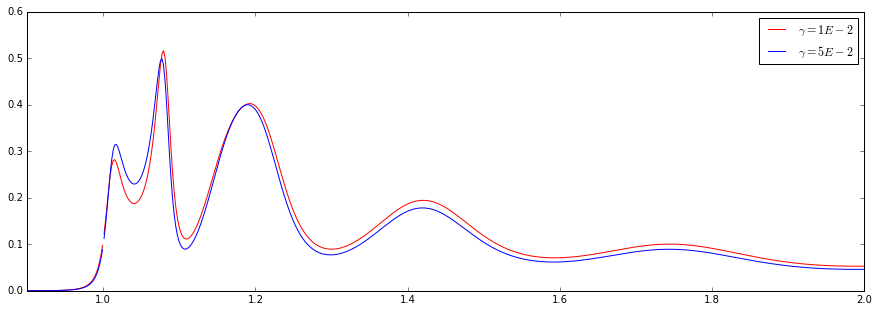

In [9]:

plot(E1,trans[:,0],"r",label="$\gamma=1E-2$")
plot(E1,trans[:,1],"b",label="$\gamma=5E-2$")

plot(E2,trans[:,2],"r")
plot(E2,trans[:,3],"b")
xlim(0.9,2)
legend()

In [10]:
print OMG

1e+14


/Users/daniellozano/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


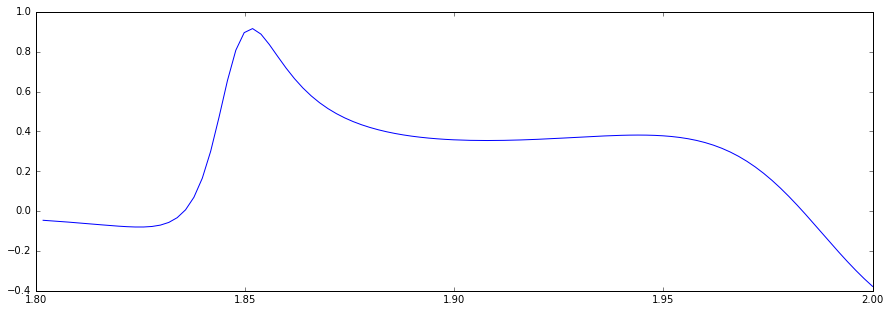

In [18]:
down=zeros(len(E1),dtype="complex")
up=zeros(len(E1),dtype="complex")
Transmission=zeros(2*len(E1),dtype="complex")
down=T_f_bellow_nd(im,E1,Vop,d,m,hbarc)
up=T_f_above_nd(im,E2,Vop,d,m,hbarc)
plot(E2,up)